Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
1981-01-06    15.8
1981-01-07    15.8
1981-01-08    17.4
1981-01-09    21.8
1981-01-10    20.0
1981-01-11    16.2
1981-01-12    13.3
1981-01-13    16.7
1981-01-14    21.5
1981-01-15    25.0
1981-01-16    20.7
1981-01-17    20.6
1981-01-18    24.8
1981-01-19    17.7
1981-01-20    15.5
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: float64


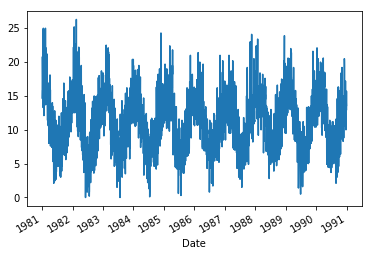

In [11]:
# line plot of time series
from pandas import Series
from matplotlib import pyplot

# load dataset
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)

# display first few rows
print(series.head(20))

# line plot of dataset
series.plot();

In [12]:
# split the dataset
from pandas import Series

series = Series.from_csv('daily-minimum-temperatures.csv', header=0)

split_point = len(series) - 7

dataset, validation = series[0:split_point], series[split_point:]

print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 3643, Validation 7


In [13]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)

In [14]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [15]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy

# load dataset
series = Series.from_csv('dataset.csv', header=None)

# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)

# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)

# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3278
Model:                     ARMA(7, 1)   Log Likelihood               -8673.748
Method:                       css-mle   S.D. of innovations              3.411
Date:                Wed, 02 Jan 2019   AIC                          17367.497
Time:                        22:09:34   BIC                          17428.447
Sample:                             0   HQIC                         17389.322
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0132      0.132      0.100      0.921      -0.246       0.273
ar.L1.y        1.1424      0.287      3.976      0.000       0.579       1.706
ar.L2.y       -0.4346      0.154     -2.829      0.0

# 4. One-Step Out-of-Sample Forecast

In [16]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy

# load dataset
series = Series.from_csv('dataset.csv', header=None)

# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)

# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)

# one-step out-of sample forecast
forecast = model_fit.forecast()[0]

# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

Forecast: 14.861671


In [17]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy
from pandas import datetime

# load dataset
series = Series.from_csv('dataset.csv', header=None)

# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)

# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)

# one-step out of sample forecast
start_index = len(differenced)
end_index = len(differenced)
forecast = model_fit.predict(start=start_index, end=end_index)

# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

Forecast: 14.861671


# 5. Multi-Step Out-of-Sample Forecast

In [18]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy

# load dataset
series = Series.from_csv('dataset.csv', header=None)

# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)

# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)

# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=7)[0]

# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    day += 1

Day 1: 14.861671
Day 2: 15.628785
Day 3: 13.331351
Day 4: 11.722416
Day 5: 10.421526
Day 6: 14.415552
Day 7: 12.674713


In [19]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy

# load dataset
series = Series.from_csv('dataset.csv', header=None)

# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)

# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)

# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 6
forecast = model_fit.predict(start=start_index, end=end_index)

# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    day += 1

Day 1: 14.861671
Day 2: 15.628785
Day 3: 13.331351
Day 4: 11.722416
Day 5: 10.421526
Day 6: 14.415552
Day 7: 12.674713
